In [1]:
#Hello Sir! If you'd like to run the entire code again, press the "restart kernel and run all cells" becuase the data might get jumbled if u rerun some of the cells!

In [2]:
import json
import pandas as pd
import numpy as np
import re
from datetime import datetime, date

#Import Data into Python
with open("transaction-data-adhoc-analysis.json", "r") as f:
    data = json.load(f)

#Import data into a Panda Dataframe
df = pd.DataFrame(data)

#Create column that store data and items
df["date_and_items"] = df["transaction_date"] + ";" + df["transaction_items"]

df.head()

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,date_and_items
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,"2022/01/12;Exotic Extras,Beef Chicharon,(x4)"
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12,"2022/01/12;Exotic Extras,Beef Chicharon,(x3);H..."
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08,"2022/01/08;HealthyKid 3+,Gummy Vitamins,(x3);H..."
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10,"2022/01/10;HealthyKid 3+,Yummy Vegetables,(x1)"
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24,"2022/01/24;Candy City,Orange Beans,(x3);Candy ..."


In [3]:
#Create List for Items and Dates
listOfAllItems = list()
for item in df["date_and_items"]:
    item = list(item.split(";"))
    for i in range(1, len(item)):
        dateAndItem = list()
        dateAndItem.append(item[0])
        dateAndItem.append(item[i])
        listOfAllItems.append(dateAndItem) 

#Create Item Database
itemDatabase = pd.DataFrame(listOfAllItems, columns=["date","itemRaw"])

#Change Items to List
def items_to_list(item):
    item = list(item.split(","))
    itemList = list()
    for attribute in item:
        itemList.append(attribute)
    return itemList
itemDatabase["item"] = itemDatabase["itemRaw"].apply(items_to_list)

#Place Each Item on a separate list
itemDatabase[['brand', 'item_name', 'quantity']] = pd.DataFrame(itemDatabase.item.tolist(), index=itemDatabase.index)

#Reformat Quantities
def reformat_quant(quantity):
    quantity = re.findall(r'\d+', quantity)
    return int(quantity[0])
itemDatabase["quantity"] = itemDatabase["quantity"].apply(reformat_quant)

#Reformat Dates
def reformat_date(date):
    datem = datetime.strptime(date, "%Y/%m/%d")
    return datem.month
itemDatabase["date"] = itemDatabase["date"].apply(reformat_date)

print("Item Database that stores One Item per Row while Maintaining its Name, Brand and Quantity")
itemDatabase

Item Database that stores One Item per Row while Maintaining its Name, Brand and Quantity


,date,itemRaw,item,brand,item_name,quantity
0,1,"Exotic Extras,Beef Chicharon,(x4)","[Exotic Extras, Beef Chicharon, (x4)]",Exotic Extras,Beef Chicharon,4
1,1,"Exotic Extras,Beef Chicharon,(x3)","[Exotic Extras, Beef Chicharon, (x3)]",Exotic Extras,Beef Chicharon,3
2,1,"HealthyKid 3+,Nutrional Milk,(x4)","[HealthyKid 3+, Nutrional Milk, (x4)]",HealthyKid 3+,Nutrional Milk,4
3,1,"Candy City,Orange Beans,(x1)","[Candy City, Orange Beans, (x1)]",Candy City,Orange Beans,1
4,1,"HealthyKid 3+,Gummy Vitamins,(x3)","[HealthyKid 3+, Gummy Vitamins, (x3)]",HealthyKid 3+,Gummy Vitamins,3
...,...,...,...,...,...,...
166114,6,"HealthyKid 3+,Nutrional Milk,(x2)","[HealthyKid 3+, Nutrional Milk, (x2)]",HealthyKid 3+,Nutrional Milk,2
166115,6,"Candy City,Gummy Worms,(x2)","[Candy City, Gummy Worms, (x2)]",Candy City,Gummy Worms,2
166116,6,"HealthyKid 3+,Nutrional Milk,(x1)","[HealthyKid 3+, Nutrional Milk, (x1)]",HealthyKid 3+,Nutrional Milk,1
166117,6,"Candy City,Gummy Worms,(x3)","[Candy City, Gummy Worms, (x3)]",Candy City,Gummy Worms,3


In [4]:
#Create list and datframe of unique items
uniqueItemsDf = pd.DataFrame(itemDatabase["item_name"])
uniqueItemsDf["brand"] = itemDatabase["brand"]
uniqueItemsDf = uniqueItemsDf.drop_duplicates()
uniqueItemsDf = uniqueItemsDf.rename(columns = {"item_name":"item"})
uniqueItemsDf = uniqueItemsDf.reset_index()
uniqueItemsDf = uniqueItemsDf.drop(["index"], axis = 1)
print("List of Unique Items")
uniqueItemsDf

List of Unique Items


,item,brand
0,Beef Chicharon,Exotic Extras
1,Nutrional Milk,HealthyKid 3+
2,Orange Beans,Candy City
3,Gummy Vitamins,HealthyKid 3+
4,Yummy Vegetables,HealthyKid 3+
5,Gummy Worms,Candy City
6,Kimchi and Seaweed,Exotic Extras


In [5]:
#Create dataframe for items sold per month
uniqueItems = uniqueItemsDf["item"]
monthlySales = pd.DataFrame(uniqueItems,columns=["item"])
monthlySales["brand"] = uniqueItemsDf["brand"]
uniqueMonths = itemDatabase["date"].unique()

#Count Sales per item per month
for month in uniqueMonths:
    quantsInOneMonth = list()
    for item in uniqueItems:
        quantsInOneMonth.append(itemDatabase[(itemDatabase["date"] == month) & (itemDatabase["item_name"] == item)].sum()["quantity"])
    dummyDate = date(1900, month, 1).strftime('%B')
    monthlySales[dummyDate] = quantsInOneMonth
    
#Add column for total sales per item
itemTotals = list()
for i in range(len(monthlySales.index)):
    itemTotals.append(monthlySales.drop(["item","brand"],axis=1).loc[i].sum())
monthlySales["Total Item Sales"] = itemTotals
    
#Add Row For Aggregated Sums
aggRow = ["Total Monthly Sales","Not Applicable"]
for month in uniqueMonths:
    dummyDate = date(1900, month, 1).strftime('%B')
    aggRow.append(monthlySales[dummyDate].sum())
aggRow.append(monthlySales["Total Item Sales"].sum())
monthlySales.loc[len(monthlySales.index)] = aggRow

print("Lola Tamis' Monthly Sales per Item per Month")
monthlySales

Lola Tamis' Monthly Sales per Item per Month


,item,brand,January,February,March,April,May,June,Total Item Sales
0,Beef Chicharon,Exotic Extras,9665,10001,9816,9890,10028,9902,59302
1,Nutrional Milk,HealthyKid 3+,9727,9691,9876,9786,9881,9767,58728
2,Orange Beans,Candy City,9774,10037,9611,9914,9964,10106,59406
3,Gummy Vitamins,HealthyKid 3+,9681,9980,10145,9842,9948,9980,59576
4,Yummy Vegetables,HealthyKid 3+,9959,10256,9896,9861,9735,9722,59429
5,Gummy Worms,Candy City,9559,9996,9986,10043,9801,9934,59319
6,Kimchi and Seaweed,Exotic Extras,9676,9949,9967,9921,9773,10104,59390
7,Total Monthly Sales,Not Applicable,68041,69910,69297,69257,69130,69515,415150


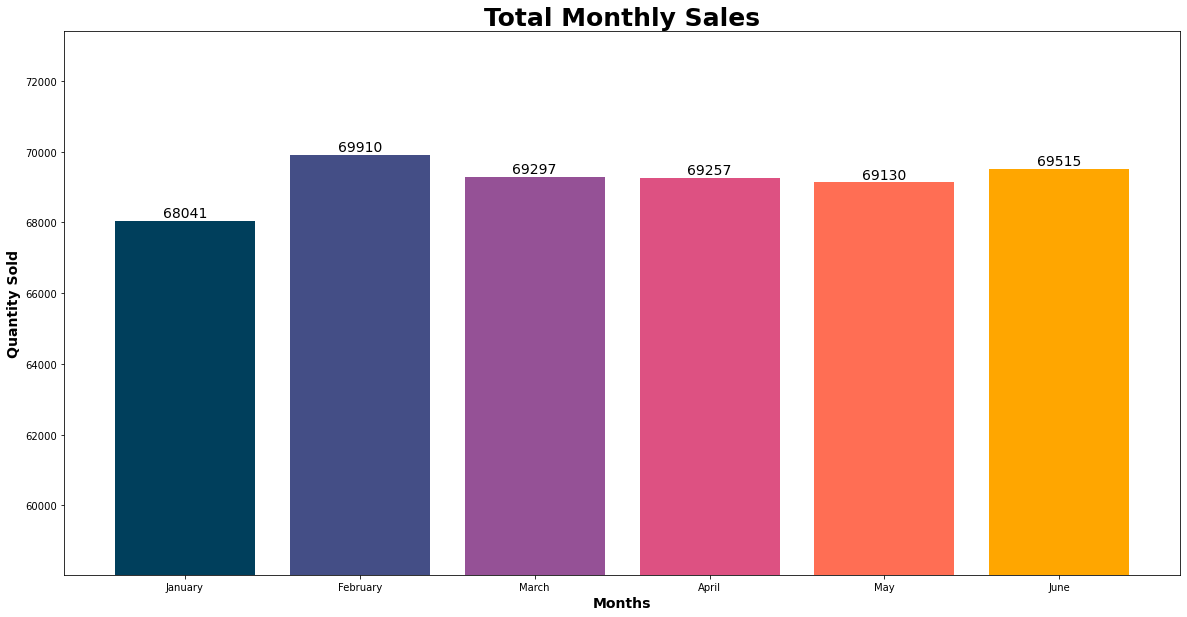

In [6]:
#Plot Total Monthly Sales
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots()
fig.set_size_inches(20,10)

tempTable = monthlySales.drop(["item","brand","Total Item Sales"], axis=1)
totals = tempTable.loc[len(tempTable.index)-1]
colors = ['#003f5c','#444e86','#955196','#dd5182','#ff6e54','#ffa600'] #Color Palette from https://www.learnui.design/tools/data-color-picker.html#palette
axes.bar(height=totals, x=tempTable.columns, color=colors)
axes.set_title(label = 'Total Monthly Sales',fontsize=25, weight='bold')
axes.set_ylabel("Quantity Sold", fontsize=14, weight='bold')
axes.set_xlabel("Months", fontsize=14, weight='bold')
axes.set_ylim(np.min(totals)-10000)
for item in range(len(tempTable.columns)):
    axes.annotate(totals[item], (tempTable.columns[item],totals[item]+100),fontsize=14,horizontalalignment ='center')

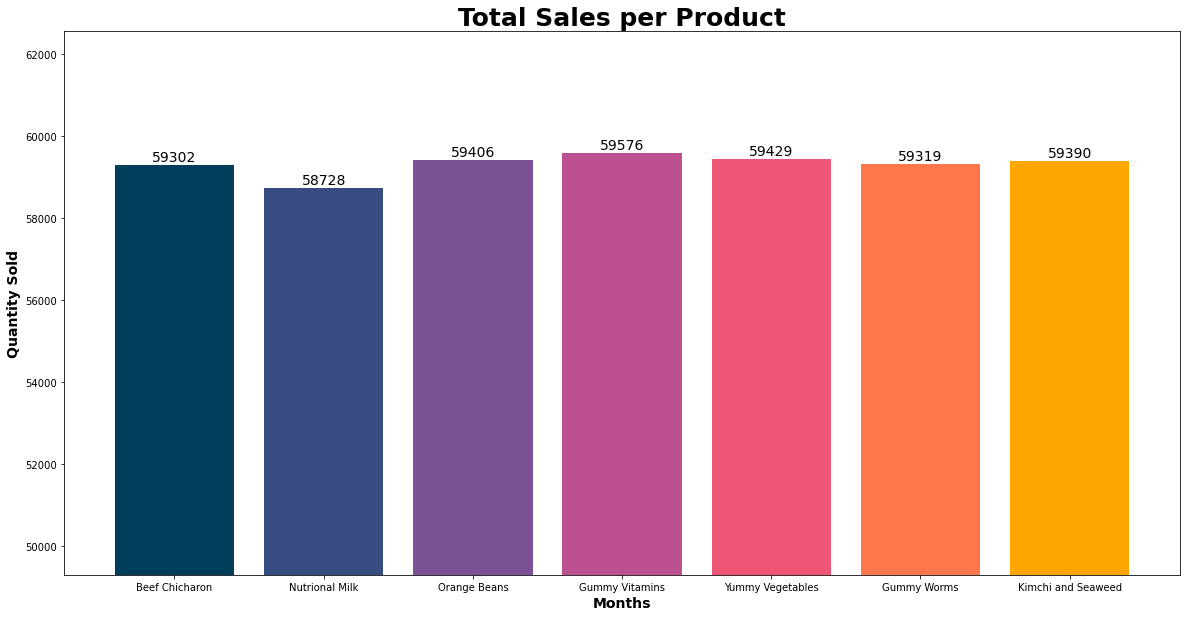

In [7]:
#Plot Total Product Sales
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots()
fig.set_size_inches(20,10)

tempTable = monthlySales.drop(["brand","Total Item Sales"], axis=1)
tempTable = tempTable.drop(len(tempTable["item"])-1)
itemTotals = list()
for i in range(len(tempTable.index)):
    itemTotals.append(tempTable.drop(["item"],axis=1).loc[i].sum())

colors = ['#003f5c','#374c80','#7a5195','#bc5090','#ef5675','#ff764a','#ffa600'] #Color Palette from https://www.learnui.design/tools/data-color-picker.html#palette
axes.bar(height=itemTotals, x=tempTable["item"], color=colors)
axes.set_title(label = 'Total Sales per Product',fontsize=25, weight='bold')
axes.set_ylabel("Quantity Sold", fontsize=14, weight='bold')
axes.set_xlabel("Months", fontsize=14, weight='bold')
axes.set_ylim(np.mean(itemTotals)-10000)
for item in range(len(tempTable["item"])):
    axes.annotate(itemTotals[item], (tempTable["item"][item],itemTotals[item]+100),fontsize=14,horizontalalignment ='center')

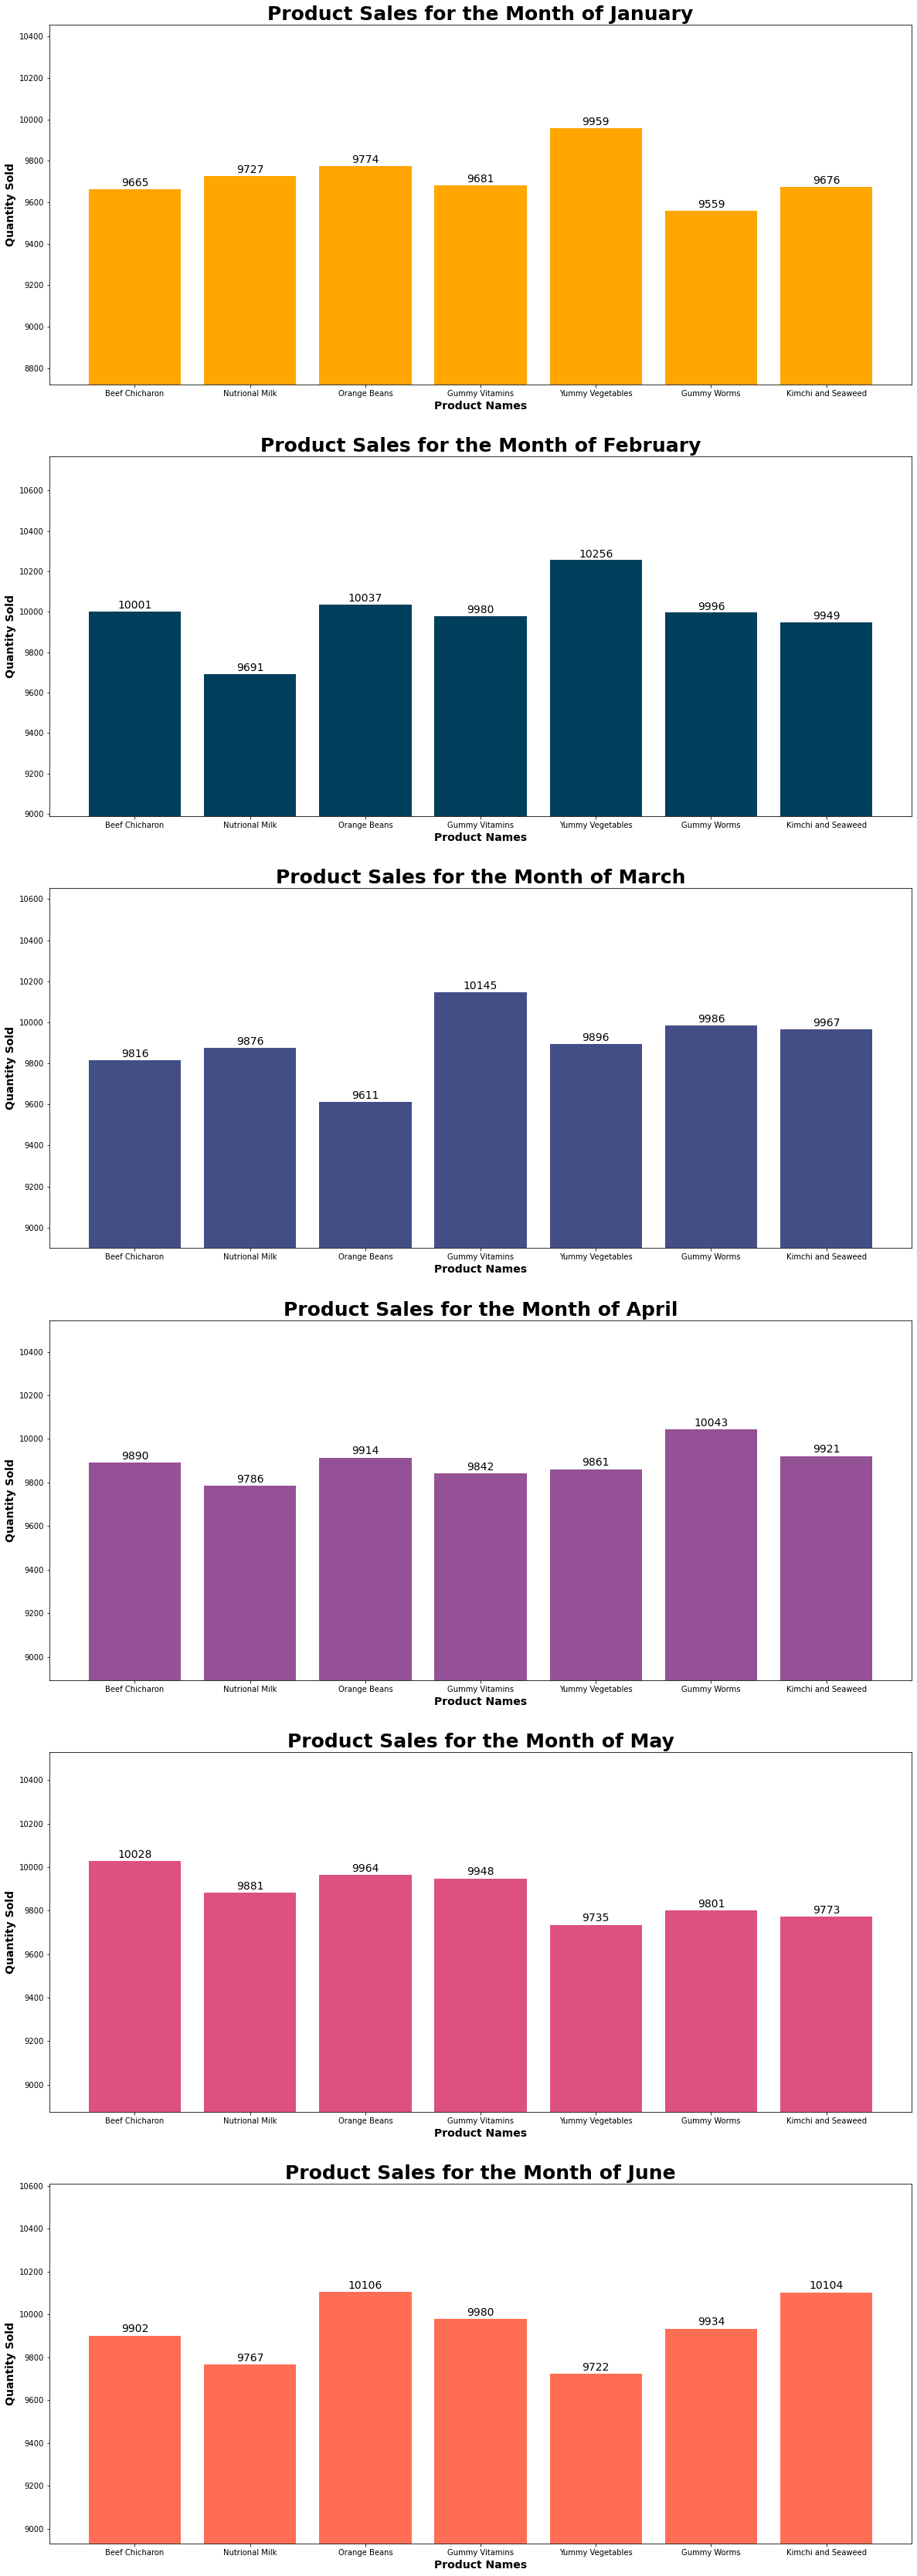

In [8]:
#Monthly Sales Graph
import matplotlib.pyplot as plt
%matplotlib inline

#Remove Totals
monthlySales = monthlySales.drop(index=len(monthlySales)-1)

fig, axes = plt.subplots(6,1)
fig.set_size_inches(20,60)
fig.subplots_adjust(hspace = 0.2)
curGraph = 0
monthlySalesValues = monthlySales.drop(["item","brand","Total Item Sales"], axis=1)
colors = ['#003f5c','#444e86','#955196','#dd5182','#ff6e54','#ffa600'] #Color Palette from https://www.learnui.design/tools/data-color-picker.html#palette
for monthHeader in monthlySalesValues.columns:
    axes[curGraph].bar(height=monthlySales[monthHeader], x=monthlySales["item"], color=colors[curGraph-1])
    axes[curGraph].set_title(label = f'Product Sales for the Month of {monthHeader}',fontsize=25, weight='bold')
    axes[curGraph].set_ylabel("Quantity Sold", fontsize=14, weight='bold')
    axes[curGraph].set_xlabel("Product Names", fontsize=14, weight='bold')
    axes[curGraph].set_xticks(monthlySales["item"], size = 20)
    axes[curGraph].set_ylim(np.mean(monthlySales[monthHeader])-1000)
    for value in range(len(monthlySales[monthHeader])):
        axes[curGraph].annotate(monthlySales[monthHeader][value], (monthlySales["item"][value], monthlySales[monthHeader][value]+15),fontsize=14,horizontalalignment ='center')
    curGraph += 1

In [9]:
#Find Prices for Products (Relies on at least one customer buying one product)
itemAndPrice = list()
for rawItems in itemDatabase["itemRaw"].unique():
    if rawItems.endswith("(x1)"):
        newItemAndPrice = list()
        newItemAndPrice.append(rawItems)
        newItemAndPrice.append(df[(df["transaction_items"] == rawItems)]["transaction_value"].max())
        itemAndPrice.append(newItemAndPrice)

itemAndPrice = pd.DataFrame(itemAndPrice, columns=["item","price_per_item"])
def get_item(itemName):
    itemName = list(itemName.split(","))[1]
    return itemName
itemAndPrice["item"] = itemAndPrice["item"].apply(get_item)

totalSaleValue = monthlySales.drop("Total Item Sales", axis=1).copy()
totalSaleValue = pd.merge(totalSaleValue, itemAndPrice, on="item")

for month in uniqueMonths+1:
    totalSaleValue.iloc[:,month] = totalSaleValue.iloc[:,month].mul(totalSaleValue["price_per_item"], axis=0)

#Add column for total sales volume per item
itemSalesTotals = list()
for i in range(len(totalSaleValue.index)):
    itemSalesTotals.append(totalSaleValue.drop(["item","brand","price_per_item"],axis=1).loc[i].sum())
totalSaleValue["Total Item Sales Volume"] = itemSalesTotals    
    
#Add Row For Aggregated Sums
aggRow = ["Total Monthly Sales Volume","Not Applicable"]
for month in uniqueMonths:
    dummyDate = date(1900, month, 1).strftime('%B')
    aggRow.append(totalSaleValue[dummyDate].sum())
aggRow.append("Not Applicable")
aggRow.append(totalSaleValue["Total Item Sales Volume"].sum())
totalSaleValue.loc[len(totalSaleValue.index)] = aggRow 
    
totalSaleValue

,item,brand,January,February,March,April,May,June,price_per_item,Total Item Sales Volume
0,Beef Chicharon,Exotic Extras,12554835,12991299,12750984,12847110,13026372,12862698,1299,77033298
1,Nutrional Milk,HealthyKid 3+,19356730,19285090,19653240,19474140,19663190,19436330,1990,116868720
2,Orange Beans,Candy City,1945026,1997363,1912589,1972886,1982836,2011094,199,11821794
3,Gummy Vitamins,HealthyKid 3+,14521500,14970000,15217500,14763000,14922000,14970000,1500,89364000
4,Yummy Vegetables,HealthyKid 3+,4979500,5128000,4948000,4930500,4867500,4861000,500,29714500
5,Gummy Worms,Candy City,1433850,1499400,1497900,1506450,1470150,1490100,150,8897850
6,Kimchi and Seaweed,Exotic Extras,7731124,7949251,7963633,7926879,7808627,8073096,799,47452610
7,Total Monthly Sales Volume,Not Applicable,62522565,63820403,63943846,63420965,63740675,63704318,Not Applicable,381152772


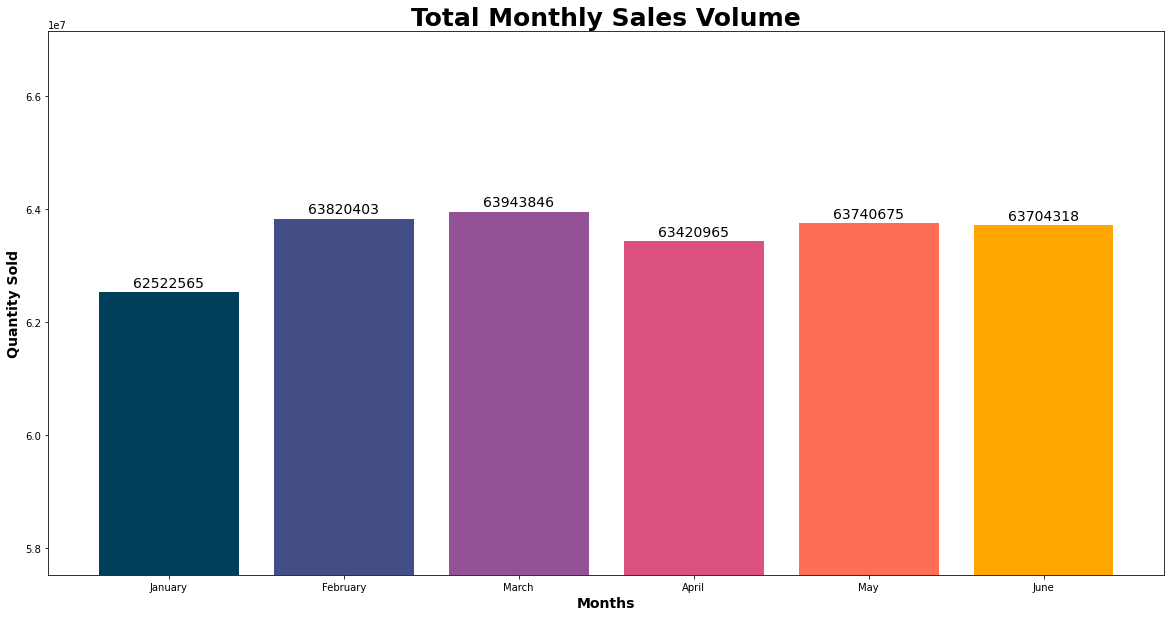

In [10]:
#Total Monthly Sales Volume
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots()
fig.set_size_inches(20,10)

tempTable = totalSaleValue.drop(["item","brand","price_per_item","Total Item Sales Volume"], axis=1)
totals = tempTable.loc[len(tempTable.index)-1]
colors = ['#003f5c','#444e86','#955196','#dd5182','#ff6e54','#ffa600'] #Color Palette from https://www.learnui.design/tools/data-color-picker.html#palette
axes.bar(height=totals, x=tempTable.columns, color=colors)
axes.set_title(label = 'Total Monthly Sales Volume',fontsize=25, weight='bold')
axes.set_ylabel("Quantity Sold", fontsize=14, weight='bold')
axes.set_xlabel("Months", fontsize=14, weight='bold')
axes.set_ylim(np.min(totals)-5000000)
for item in range(len(tempTable.columns)):
    axes.annotate(totals[item], (tempTable.columns[item],totals[item]+100000),fontsize=14,horizontalalignment ='center')

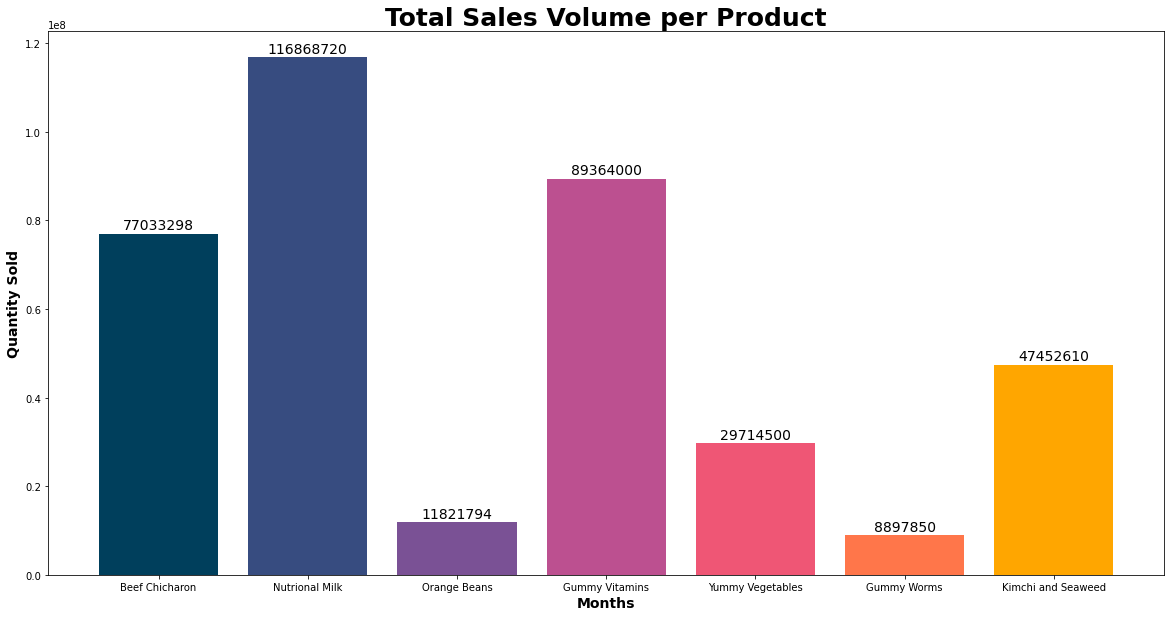

In [11]:
#Plot Total Product Sales Volume
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots()
fig.set_size_inches(20,10)

tempTable = totalSaleValue.drop(["brand","price_per_item"], axis=1)
tempTable = tempTable.drop(len(tempTable["item"])-1)

colors = ['#003f5c','#374c80','#7a5195','#bc5090','#ef5675','#ff764a','#ffa600'] #Color Palette from https://www.learnui.design/tools/data-color-picker.html#palette
axes.bar(height=tempTable["Total Item Sales Volume"], x=tempTable["item"], color=colors)
axes.set_title(label = 'Total Sales Volume per Product',fontsize=25, weight='bold')
axes.set_ylabel("Quantity Sold", fontsize=14, weight='bold')
axes.set_xlabel("Months", fontsize=14, weight='bold')
for item in range(len(tempTable["item"])):
    axes.annotate(tempTable["Total Item Sales Volume"][item], (tempTable["item"][item],tempTable["Total Item Sales Volume"][item]+1000000),fontsize=14,horizontalalignment ='center')

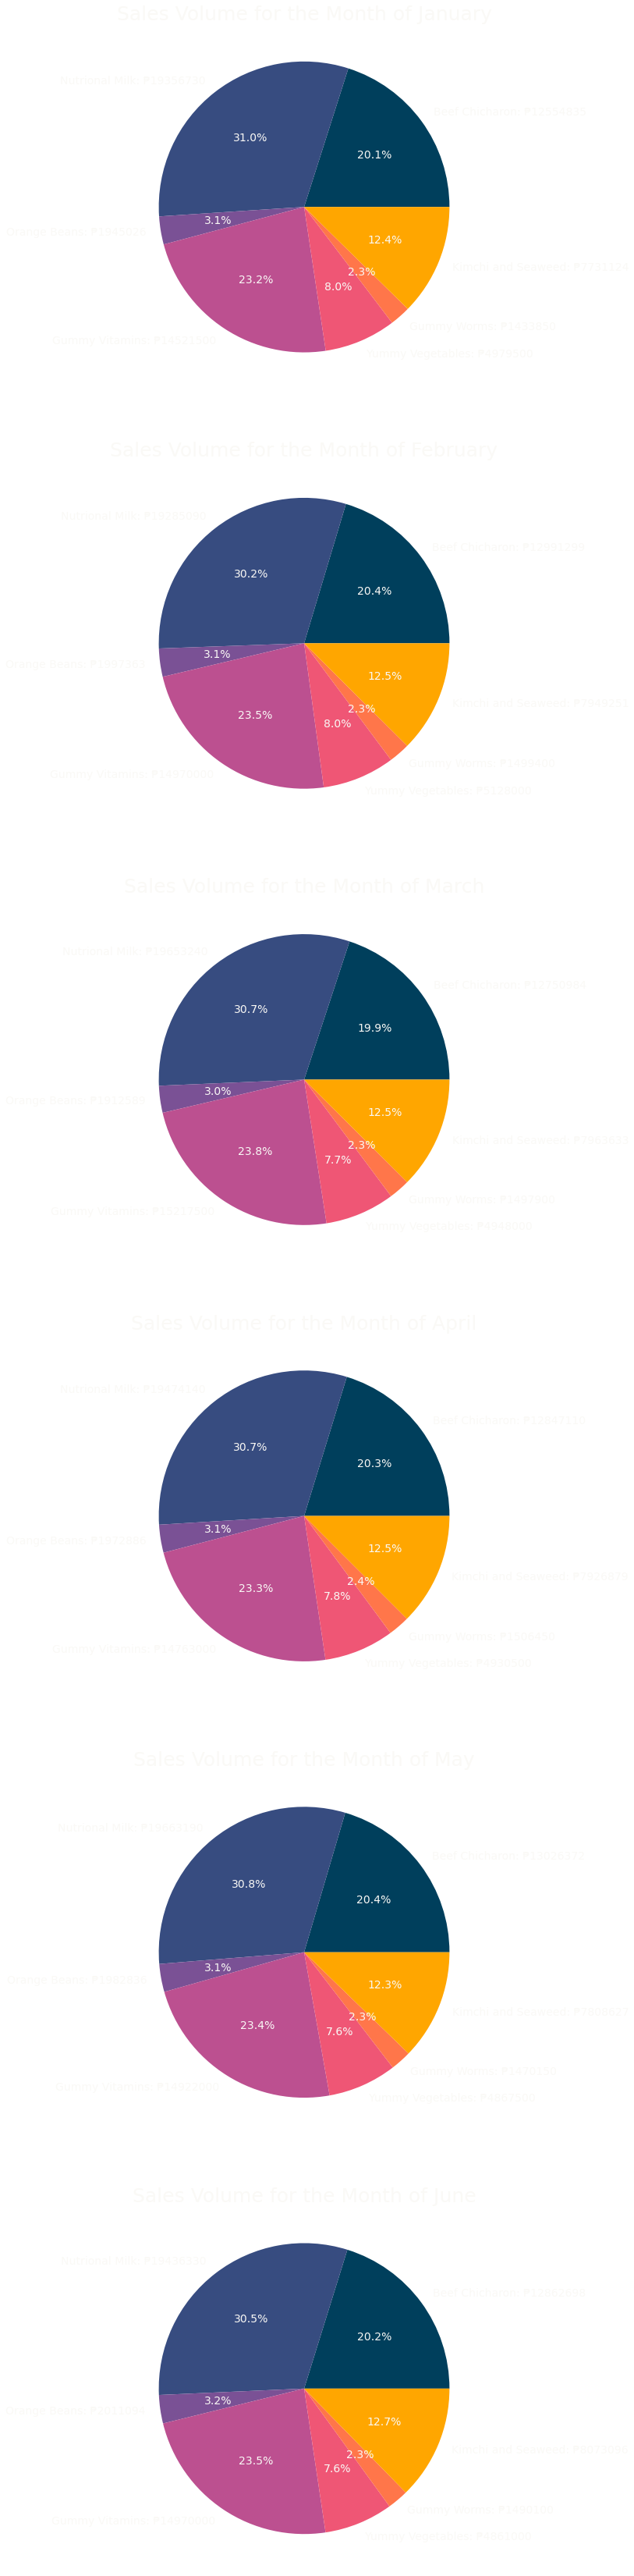

In [12]:
#Total Sale Value Graph
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(6,1)
fig.set_size_inches(20,60)

#Remove Totals
totalSaleValue = totalSaleValue.drop(index=len(totalSaleValue)-1)

pieColors = ['#003f5c','#374c80','#7a5195','#bc5090','#ef5675','#ff764a','#ffa600']
curGraph = 0
    
for monthHeader in monthlySalesValues.columns:
    pieLabels = list()
    for itemNum in range(len(totalSaleValue["item"])):
        pieLabels.append(str(totalSaleValue["item"][itemNum]) + ": ₱" + str(totalSaleValue[monthHeader][itemNum]))

    axes[curGraph].pie(totalSaleValue[monthHeader], labels = pieLabels, autopct='%1.1f%%', colors = pieColors, textprops={'fontsize': 14, 'color':'#FAF9F6'})
    axes[curGraph].set_title(f"Sales Volume for the Month of {monthHeader}", fontsize = 25, color = '#FAF9F6')
    curGraph += 1

In [13]:
#Create Customer Info Database
demographicsIWant = ['address', 'birthdate', 'name', 'sex', 'username','mail']
customerInfo = pd.DataFrame(df['transaction_date'])
for demograph in demographicsIWant:
    customerInfo[demograph] = df[demograph]

def add_months(givenDate):
    datem = datetime.strptime(givenDate, "%Y/%m/%d")
    return datem.month
mauDf = pd.DataFrame(customerInfo['transaction_date'])
mauDf['name'] = customerInfo['mail']
mauDf['transaction_date'] = mauDf['transaction_date'].apply(add_months)
mauDf = mauDf.drop_duplicates()
cmbdf = mauDf.groupby('name')['transaction_date'].apply(list).reset_index(name="months_bought")

cmbdf

,name,months_bought
0,aallen@hotmail.com,"[1, 2, 3, 4, 5, 6]"
1,aaron21@yahoo.com,"[1, 2, 3, 4, 5, 6]"
2,aaron37@hotmail.com,"[1, 3, 4, 6]"
3,aaron45@hotmail.com,"[1, 2, 3, 5, 6]"
4,aaronbrady@hotmail.com,"[1, 2, 3, 4, 5]"
...,...,...
8830,zwillis@hotmail.com,"[1, 2, 3, 4, 5, 6]"
8831,zwilson@hotmail.com,"[2, 4, 5, 6]"
8832,zwright@gmail.com,"[1, 2, 3, 5]"
8833,zyoung@hotmail.com,"[1, 2, 4, 5, 6]"


In [14]:
#Create Lola tamis Database

lolaTamis = pd.DataFrame(["Repeaters","Inactive","Engaged","First Time Buyers"],columns=["Metrics"])

for month in uniqueMonths: #Iterate through each month to add data per column
    monthlyMetrics = list()
    repeaters = 0
    inactive = 0
    engaged = 0
    firstBuyers = 0
    
    for userAct in cmbdf["months_bought"]: #Iterate through each item in purchase history
        if month in userAct:  #Current month in loop is found in list
            pastMonthsInc = range(1,month+1) #Create a list of past months
            monthlyAppearancesInc = 0
            for months in pastMonthsInc:
                if months in userAct:
                    monthlyAppearancesInc += 1
            if monthlyAppearancesInc == len(pastMonthsInc): #If the customers's list and the past "months" list are equal, monthlyAppearancesInc should have the same length as the past months
                engaged+=1 
                if month == 1: #At the first month, engaged customers are also first time buyers
                    firstBuyers += 1 
                else: #If you are bought all months, you also bought in the previous month
                    repeaters+=1
            elif month-1 in userAct: #If you bought last month, you are a repeater
                repeaters+=1
            else:
                monthlyAppearancesExc = 0
                for months in list(range(1,month)): #checks each month if customer bought
                    if months in userAct:
                        monthlyAppearancesExc += 1
                if monthlyAppearancesExc == 0: #If the customer never bought before, this would stay zero
                    firstBuyers += 1
        else:
            pastMonthsExclusive = list(range(1,month))
            for months in pastMonthsExclusive:
                if months in userAct: #If you did not buy this month, but you have bought at least once in the past months, you are inactive
                    inactive +=1
                    break
    #Consolidate data and add to month column
    monthlyMetrics.extend([repeaters, inactive, engaged, firstBuyers])
    dummyDate = date(1900, month, 1).strftime('%B')
    lolaTamis[dummyDate] = monthlyMetrics
    
lolaTamis

,Metrics,January,February,March,April,May,June
0,Repeaters,0,5275,5331,5296,5237,5320
1,Inactive,0,1525,1865,2031,2054,1964
2,Engaged,6800,5275,4169,3304,2655,2159
3,First Time Buyers,6800,1553,356,102,21,3


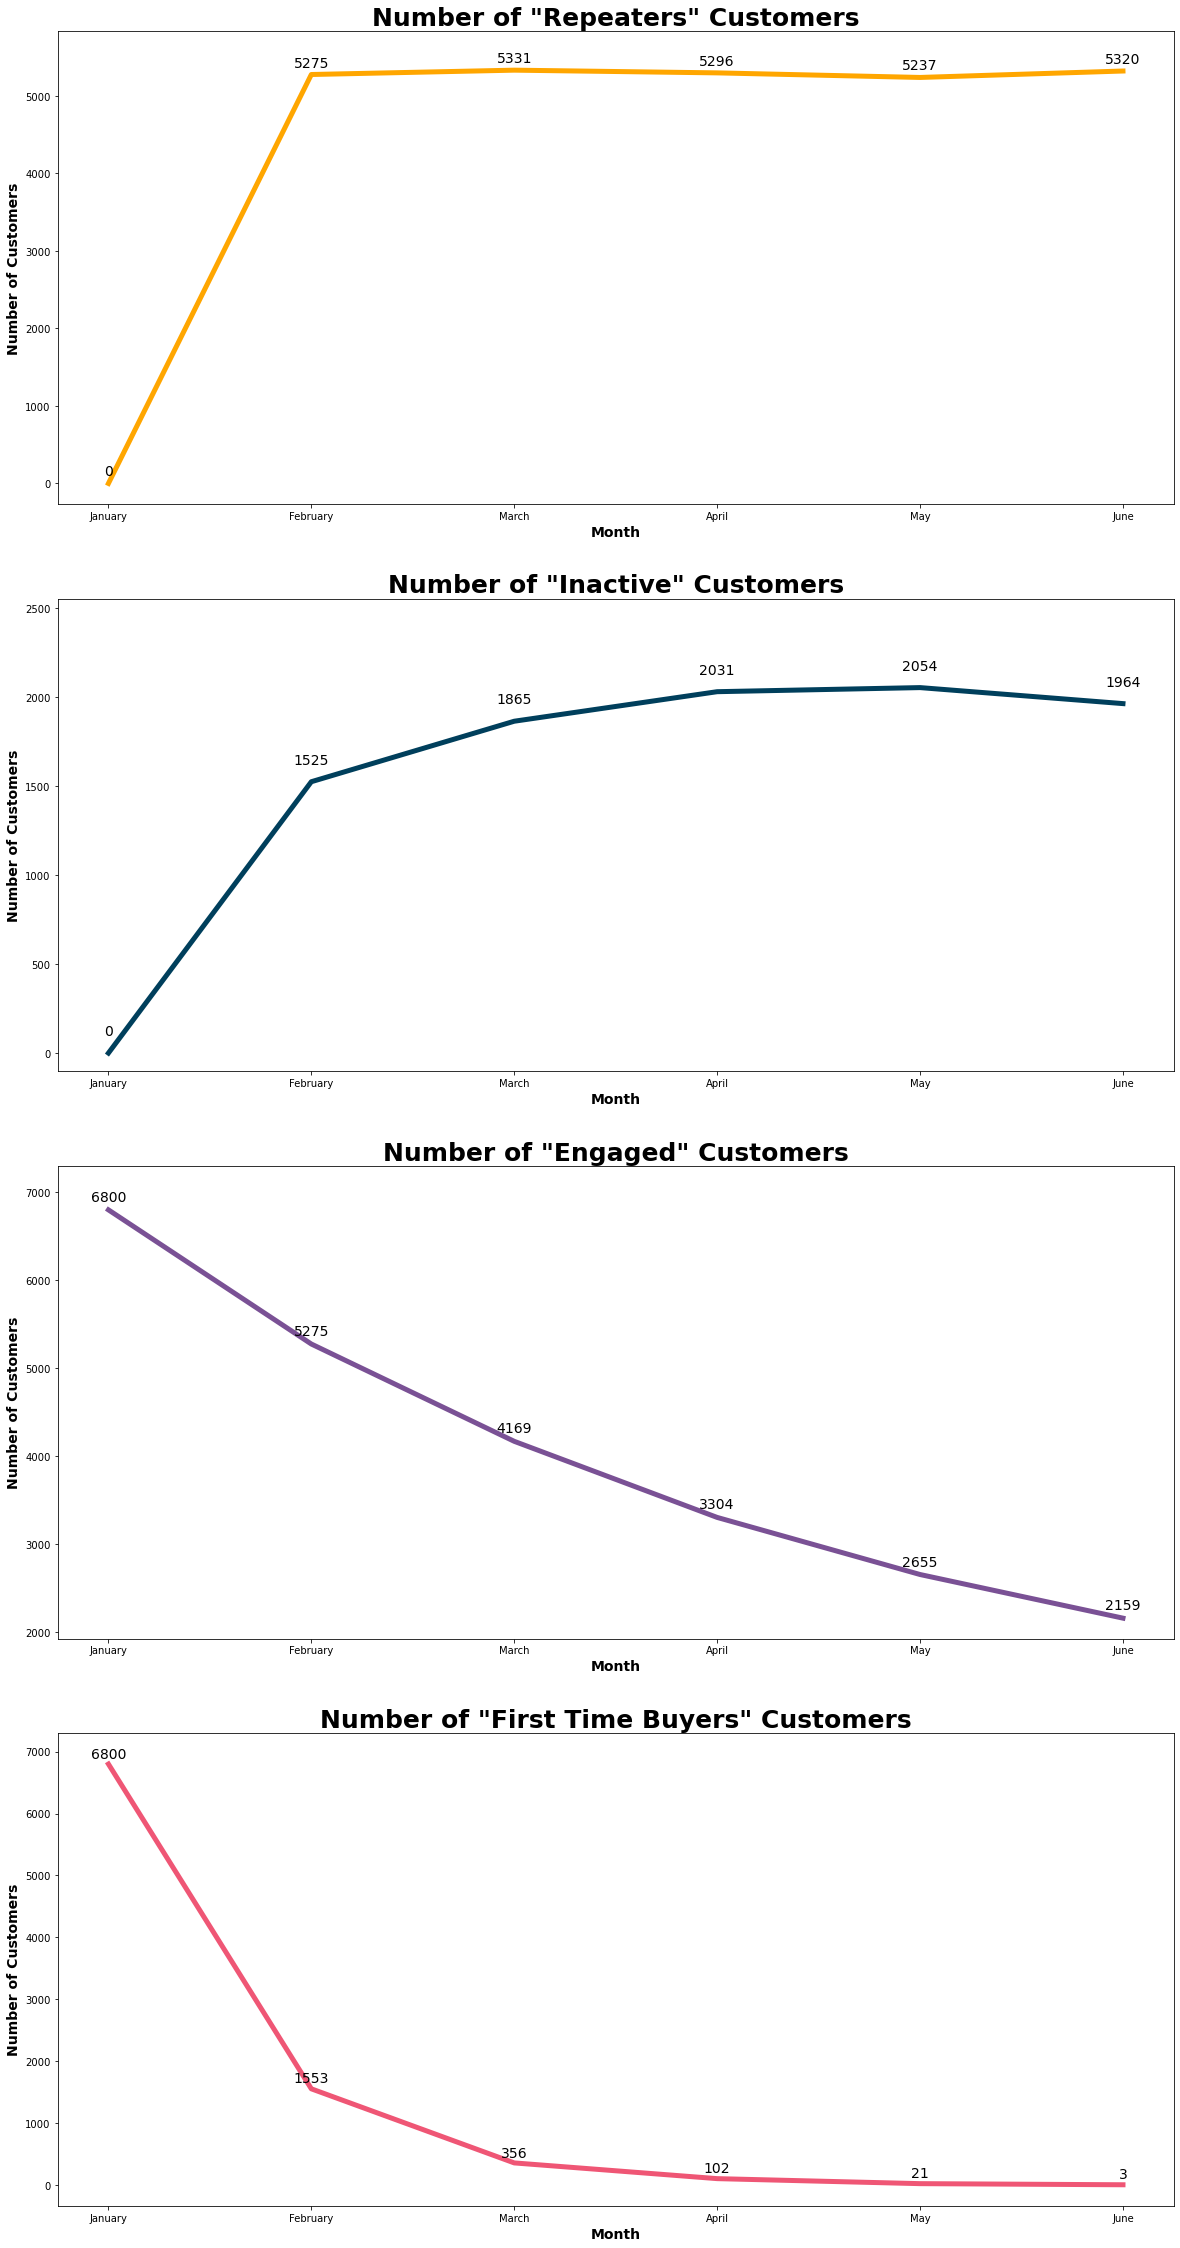

In [15]:
#Customer Data Graph
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(4,1)
fig.set_size_inches(20,40)

curGraph = 0
colors = ['#003f5c','#7a5195','#ef5675','#ffa600']
for metric in lolaTamis["Metrics"]:
    metricList = lolaTamis[lolaTamis["Metrics"]==metric].values.flatten().tolist()
    metricList.pop(0)
    axes[curGraph].plot(lolaTamis.iloc[:,1:len(uniqueMonths)+1].columns, metricList, color=colors[curGraph-1], linewidth = 5)
    axes[curGraph].set_title(label = f'Number of "{metric}" Customers',fontsize=25, weight='bold')
    axes[curGraph].set_ylabel("Number of Customers",fontsize=14, weight='bold')
    axes[curGraph].set_xlabel("Month",fontsize=14, weight='bold')
    axes[curGraph].set_ylim(top = np.max(metricList)+500)
    for value in range(len(metricList)):
        axes[curGraph].annotate(metricList[value], (lolaTamis.iloc[:,1:len(uniqueMonths)+1].columns[value], metricList[value]+100),fontsize=14, horizontalalignment ='center')
    curGraph +=1

Text(0.5, 1.0, 'Customer Sexual Orientation')

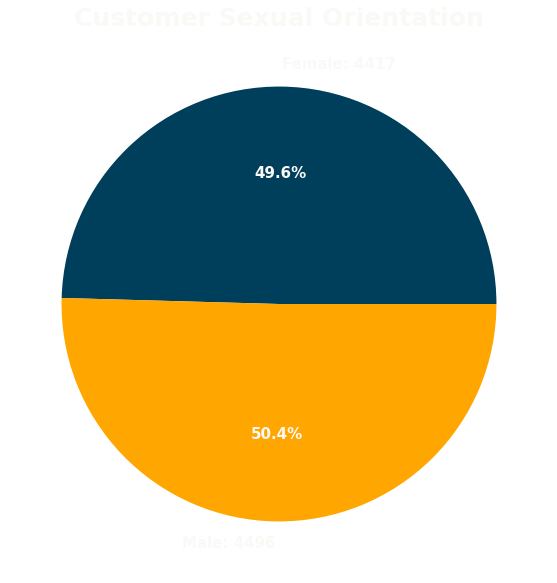

In [16]:
#Sex Demographics
customerSexes = customerInfo[["mail","sex"]].copy()
customerSexes = customerSexes.drop_duplicates()
customerSexes = customerSexes.groupby('sex').count()

fig, axes = plt.subplots()
fig.set_size_inches(10,10)

pieColors = ['#003f5c','#ffa600']

pieLabels = list()
labels=["Female","Male"]
for sexNum in range(2):
    pieLabels.append(str(labels[sexNum]) + ": " + str(customerSexes["mail"][sexNum]))

axes.pie(customerSexes['mail'], labels=pieLabels, autopct='%1.1f%%',colors = pieColors,textprops={'fontsize': 15, 'color':'#FAF9F6', 'weight' : 'bold'})
axes.set_title("Customer Sexual Orientation", fontsize = 25, color = '#FAF9F6', weight = 'bold')

Text(0.5, 1.0, 'Customer Age Group')

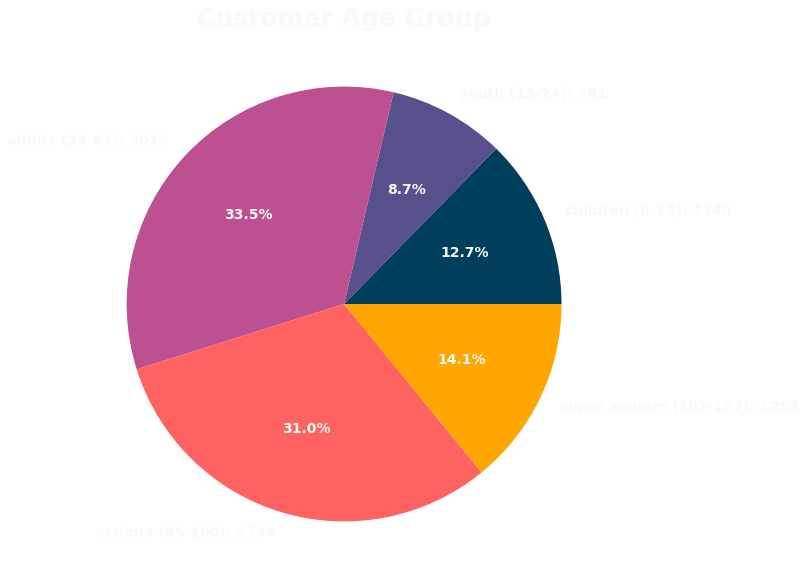

In [17]:
#Age Groups
ageGroups = pd.DataFrame(customerInfo["mail"])
ageGroups["birthyear"] = customerInfo["birthdate"]
def add_years(givenDate):
    datem = datetime.strptime(givenDate, "%Y/%m/%d")
    return datem.year
ageGroups["birthyear"] = ageGroups["birthyear"].apply(add_years)
ageGroups = ageGroups.drop_duplicates()

age_groupings = {
"children" : [0,0,14],
'youth' : [0,15,24],
'adults' : [0,25,64],
'seniors' : [0,65,100],
'super seniors' : [0,101,127]
}

for year in ageGroups['birthyear']:
    for grouping in age_groupings.values():
        age = 2022 - year
        if age <= grouping[2] and age >= grouping[1]:
            grouping[0] += 1

ageGroups = list()
for grouping in age_groupings.values(): 
    ageGroups.append(grouping[0])

ageGroupLabels = list()
for grouping in age_groupings.items():
    label = grouping[0] + " (" + str(grouping[1][1]) + "-" + str(grouping[1][2]) + "): " + str(grouping[1][0])
    ageGroupLabels.append(label)

fig, axes = plt.subplots()
fig.set_size_inches(10,10)

pieColors = ['#003f5c','#58508d','#bc5090','#ff6361','#ffa600']
axes.pie(ageGroups, labels=ageGroupLabels, autopct='%1.1f%%', colors = pieColors, textprops={'fontsize': 14, 'color':'#FAF9F6', 'weight' : 'bold'})
axes.set_title("Customer Age Group", fontsize = 25, color = '#FAF9F6', weight = 'bold')

In [18]:
print("Big Problem: Username, name, and email count dont match\n")
print("Number of Unique Usernames: " + str(len(df["username"].unique())))
print("Number of Unique Names: " + str(len(df["name"].unique())))
print("Number of Unique Emails: " + str(len(df["mail"].unique())))
print("\n It is understandable that people have different names so that is ok. But, usernames should definetely equal emails to ensure that customers use the same email and username every time.\n Also, since there are less names than usernames, that means that people could be creating multiple accounts!")

Big Problem: Username, name, and email count dont match

Number of Unique Usernames: 8505
Number of Unique Names: 8487
Number of Unique Emails: 8835

 It is understandable that people have different names so that is ok. But, usernames should definetely equal emails to ensure that customers use the same email and username every time.
 Also, since there are less names than usernames, that means that people could be creating multiple accounts!
